In [ ]:
# numpy and pandas imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ML Libraries for scikit
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,\
                            precision_recall_curve,precision_score,recall_score,roc_auc_score,roc_curve,\
                            matthews_corrcoef, f1_score, make_scorer, auc
from scipy.stats import skew

#  Recursive Feature Elimination
from sklearn.feature_selection import RFE
        
# Python imports
from math import log, sqrt
import re
import collections
import warnings

# decision tree visualization related imports
import pydotplus
import graphviz

from IPython.display import Image

warnings.filterwarnings('ignore')

pd.options.display.max_columns = 400

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
df_original = pd.read_csv('/content/default of credit card clients (1).csv')

In [ ]:
df = df_original.copy()

The UCI Machine Learning Repository Credit Card Dataset contains information on credit card customers in Taiwan from April to September. The dataset includes demographic information, credit information, and payment history information for 30,000 credit card customers. The dataset has 25 features, which are described below:

ID: ID of each customer


LIMIT_BAL: Credit limit of the customer


SEX: Gender of the customer (1 = male, 2 = female)


EDUCATION: Education level of the customer (1 = graduate school, 2 = university, 3 = high school, 4 = others)


MARRIAGE: Marital status of the customer (1 = married, 2 = single, 3 = others) AGE: Age of the customer

PAY_0: Repayment status in September (-2 = no consumption, -1 = paid in full, 0 = use of revolving credit, 1 = payment delay for one month, 2 = payment delay for two months, …, 8 = payment delay for eight months or more)

PAY_2: Repayment status in August (same scale as PAY_0)

PAY_3: Repayment status in July (same scale as PAY_0)

PAY_4: Repayment status in June (same scale as PAY_0)

PAY_5: Repayment status in May (same scale as PAY_0)

PAY_6: Repayment status in April (same scale as PAY_0)

BILL_AMT1: Amount of bill statement in September

BILL_AMT2: Amount of bill statement in August

BILL_AMT3: Amount of bill statement in July

BILL_AMT4: Amount of bill statement in June

BILL_AMT5: Amount of bill statement in May

BILL_AMT6: Amount of bill statement in April

PAY_AMT1: Amount paid in September

PAY_AMT2: Amount paid in August

PAY_AMT3: Amount paid in July

PAY_AMT4: Amount paid in June

PAY_AMT5: Amount paid in May

PAY_AMT6: Amount paid in April

default payment next month: Whether or not the customer defaulted in the next month (1 = yes, 0 = no)

The goal of the dataset is to predict whether a customer will default on their credit card payment in the next month, based on their demographic information, credit information, and payment history.

# About DataSet, as well as Certain Standardizations for Naming DataSet Columns

The column names were standardised (for example, pay 0 was changed to pay 1 so that it would be consistent with the names of the other fields). titles of columns should be written in lowercase (referring to them using column name would make it easy)
<br>
<br>
<br>
Dataset information pertaining to the subject at hand, the data type, and several interpretations When it is essential, we modify the columns, and we also lowercase the names when it is necessary. The omission of the column labelled PAY 1 from this collection comes as a particular surprise. In the following analysis, it is assumed that PAY 0 actually corresponds to PAY 1, and it also takes into consideration the payback from the month before to the month in which we calculate the defaulting status 

In [ ]:
df.columns = [x.lower() for x in df.columns]
df = df.rename(columns={"pay_0": "pay_1","default payment next month":"default_pay"})
cols = df.columns.values
col_names = [str(s) for s in cols]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           30000 non-null  int64
 1   limit_bal    30000 non-null  int64
 2   sex          30000 non-null  int64
 3   education    30000 non-null  int64
 4   marriage     30000 non-null  int64
 5   age          30000 non-null  int64
 6   pay_1        30000 non-null  int64
 7   pay_2        30000 non-null  int64
 8   pay_3        30000 non-null  int64
 9   pay_4        30000 non-null  int64
 10  pay_5        30000 non-null  int64
 11  pay_6        30000 non-null  int64
 12  bill_amt1    30000 non-null  int64
 13  bill_amt2    30000 non-null  int64
 14  bill_amt3    30000 non-null  int64
 15  bill_amt4    30000 non-null  int64
 16  bill_amt5    30000 non-null  int64
 17  bill_amt6    30000 non-null  int64
 18  pay_amt1     30000 non-null  int64
 19  pay_amt2     30000 non-null  int64
 20  pay_am

In [ ]:
df.head()

,id,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_pay
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
print("Explanatory variables:  {}".format(len(df.columns)-1))
print("Number of Observations: {}".format(df.shape[0]))

df['default_pay'] = df['default_pay'].astype('category')

# create a 'target' column for our own convenience
print("Target variable:       '{}' -> '{}'".format('default payment next month', 'default_pay'))

Explanatory variables:  24
Number of Observations: 30000
Target variable:       'default payment next month' -> 'default_pay'


In [ ]:
# commonly used variables
pay_status_columns = []
for x in range(1,7): pay_status_columns.append("pay_"+ str(x))
    
bill_amt_columns = []
for x in range(1,7): bill_amt_columns.append("bill_amt"+ str(x))
    
pay_amt_columns = []
for x in range(1,7): pay_amt_columns.append("pay_amt"+ str(x))

Class Statistics on entire data 30000:


,Count,Percent Split
Not Default,23364,77.88
Default,6636,22.12


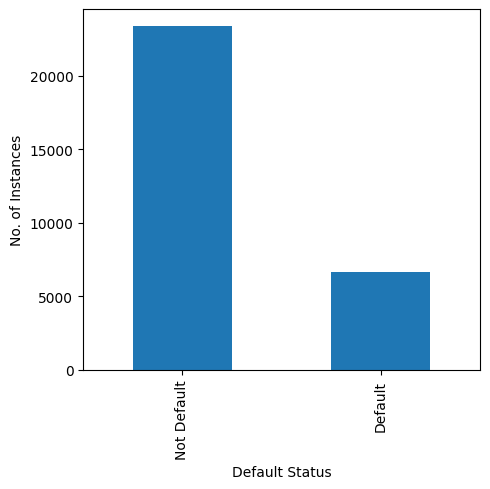

In [ ]:
total_cnt = df.shape[0]
print ('Class Statistics on entire data {}:'.format(total_cnt))
cls_cnt = df['default_pay'].value_counts()
cls_stats = pd.DataFrame ({"Count": [cls_cnt[0], cls_cnt[1]],\
                        "Percent Split" : [((cls_cnt[0] * 100.0) /total_cnt), ((cls_cnt[1] * 100.0) /total_cnt)]},
                         index=["Not Default", "Default"])
display(cls_stats)
plt.figure(figsize=(5,5))
ax = cls_cnt.plot(kind='bar')
ax.set_xlabel("Default Status")
ax.set_ylabel("No. of Instances")
ax.set_xticklabels(['Not Default',
                    'Default'])
#     for p in ax.patches:
#         ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+300))
plt.tight_layout()
plt.show()

we can see that the dataset is imbalanced as there are 23k non defaulters and 6.5k of defaulters.

### Information related to Credit Limit, Payment Status, Bill Amount and Bill Payment
We will look at how payment status, bill amount and bill payment columns look like.

#### **pay_0 - pay_6**
These columns display the payback status for the current month, including information on whether or not the bill statement for the current month has been paid. The following is represented by the numbers:

-2: The balance has been paid in full, and there have been no transactions for the given month; as a result, there is no outstanding credit to pay.


-1: The account's balance has been completely paid off, however there have been some transactions during the month that are not represented on the current bill statement.

0: The customer has paid at least the minimum needed amount, but there is still an outstanding balance amount that needs to be paid.

1-9: A missed payment for the given month is regarded to have occurred when a client does not pay at least the requisite minimum amount. The number 1-9 will be equivalent to the total number of months of missed payments as of that moment in time.

In [ ]:
df[pay_status_columns].head(3)

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0



#### **pay amt1 - pay amt6**
These columns include the sums that were paid in that particular month to settle the bill for the previous month.

In [ ]:
print('Paid Amount Columns')
display(df[pay_amt_columns].head(10))

print('\nPaid Amount Columns Statistics')
display(df[pay_amt_columns].describe())

Paid Amount Columns


,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679
5,2500,1815,657,1000,1000,800
6,55000,40000,38000,20239,13750,13770
7,380,601,0,581,1687,1542
8,3329,0,432,1000,1000,1000
9,0,0,0,13007,1122,0



Paid Amount Columns Statistics


,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


#### **bill amt1 - bill amt6**
Bill Statement of charges for the current month, including the total amount the client is responsible for paying for that particular month.


In [ ]:
print('Bill Amount Columns')
display(df[pay_amt_columns].head(10))

print('\nBill Amount Columns Statistics')
display(df[pay_amt_columns].describe())

Bill Amount Columns


,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679
5,2500,1815,657,1000,1000,800
6,55000,40000,38000,20239,13750,13770
7,380,601,0,581,1687,1542
8,3329,0,432,1000,1000,1000
9,0,0,0,13007,1122,0



Bill Amount Columns Statistics


,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [ ]:
df['limit_bal'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: limit_bal, dtype: float64

In [ ]:
# Creating a new data frame
df_pay = pd.DataFrame(columns=['credit_assigned', 'total_bill','average_bill', 'total_payment', 
                               'average_payment', 'amt_owed','amt_owed_more_thn_credit','default_status',
                              'adv_pay', 'min_pay', 'delay_pay'])
#assigning values for the columns 
df_pay['credit_assigned'] = df['limit_bal']
#sum of all bill amount columns
df_pay['total_bill'] = df[bill_amt_columns].sum(axis=1)
#average of all bill amt columns
df_pay['average_bill'] = df[bill_amt_columns].mean(axis=1)
# Sum of total payment
df_pay['total_payment'] = df[pay_amt_columns].sum(axis=1)
#Average of the payment columns
df_pay['average_payment'] = df[pay_amt_columns].mean(axis=1)
# remaining amount owed by customer to bank
df_pay['amt_owed'] = df_pay['total_bill'] - df_pay['total_payment']


#checking weather the customer owe more than the credit limit or not
df_pay['amt_owed_more_thn_credit'] = np.where(
    (df_pay['credit_assigned'] - df_pay['amt_owed']) > 0,\
    0, 1)

#for each customer based on the pay columns adjusting how many times customer paid early 
#and how many months he didnt used anything and delayed
df_1 = df[pay_status_columns]
df_pay['adv_pay'] = df_1[df_1 < 0 ].count(axis=1)
df_pay['min_pay'] = df_1[df_1 == 0 ].count(axis=1)
df_pay['delay_pay'] = df_1[df_1 > 0 ].count(axis=1)
df_pay['default_status'] = df['default_pay']
display(df_pay.head(10))

,credit_assigned,total_bill,average_bill,total_payment,average_payment,amt_owed,amt_owed_more_thn_credit,default_status,adv_pay,min_pay,delay_pay
0,20000,7704,1284.000000,689,114.833333,7015,0,1,4,0,2
1,120000,17077,2846.166667,5000,833.333333,12077,0,1,1,3,2
2,90000,101653,16942.166667,11018,1836.333333,90635,1,0,0,6,0
3,50000,231334,38555.666667,8388,1398.000000,222946,1,0,0,6,0
4,50000,109339,18223.166667,59049,9841.500000,50290,1,0,2,4,0
5,50000,238114,39685.666667,7772,1295.333333,230342,1,0,0,6,0
6,500000,2724595,454099.166667,180759,30126.500000,2543836,1,0,0,6,0
7,100000,13486,2247.666667,4791,798.500000,8695,0,0,3,3,0
8,140000,65212,10868.666667,6761,1126.833333,58451,0,0,0,5,1
9,20000,26919,4486.500000,14129,2354.833333,12790,0,0,6,0,0


Exrracting more information from the dataset for new feature creation

adv pay : Number of times -2,-1 has occured in pay status<br>
min Pay : Number of times 0 has occured in pay status<br>
delay pay: Number of times 1 and above digits occured in pay status

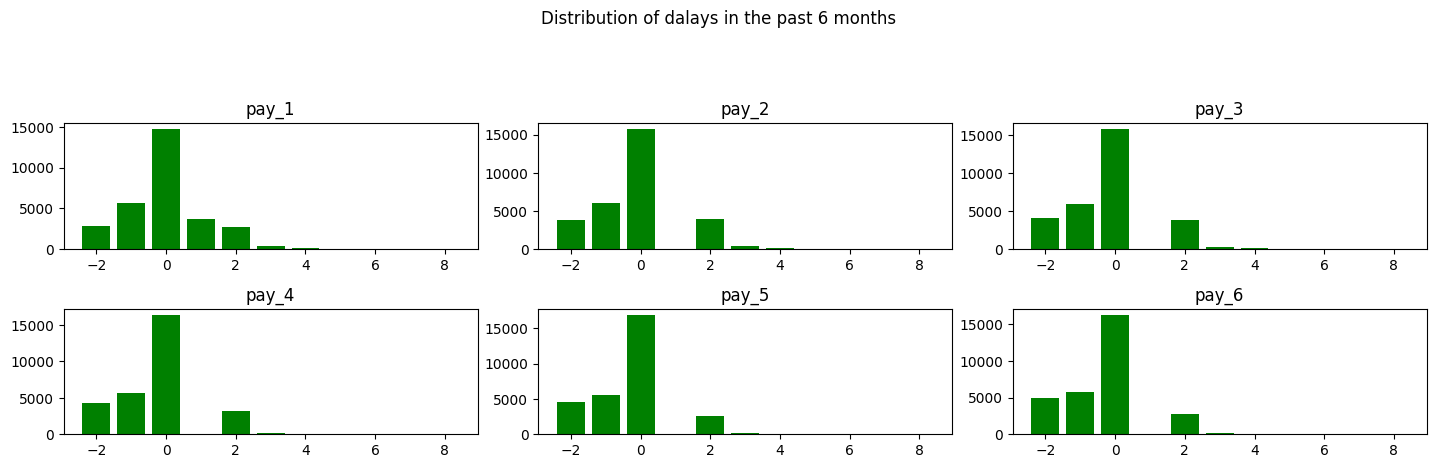

In [ ]:
#Distribution of dalays in the past 6 months
fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,5)
fig.suptitle('Distribution of dalays in the past 6 months')

for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = df[pay_status_columns[i]].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='g')
    ax[row,col].set_title(pay_status_columns[i])

plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

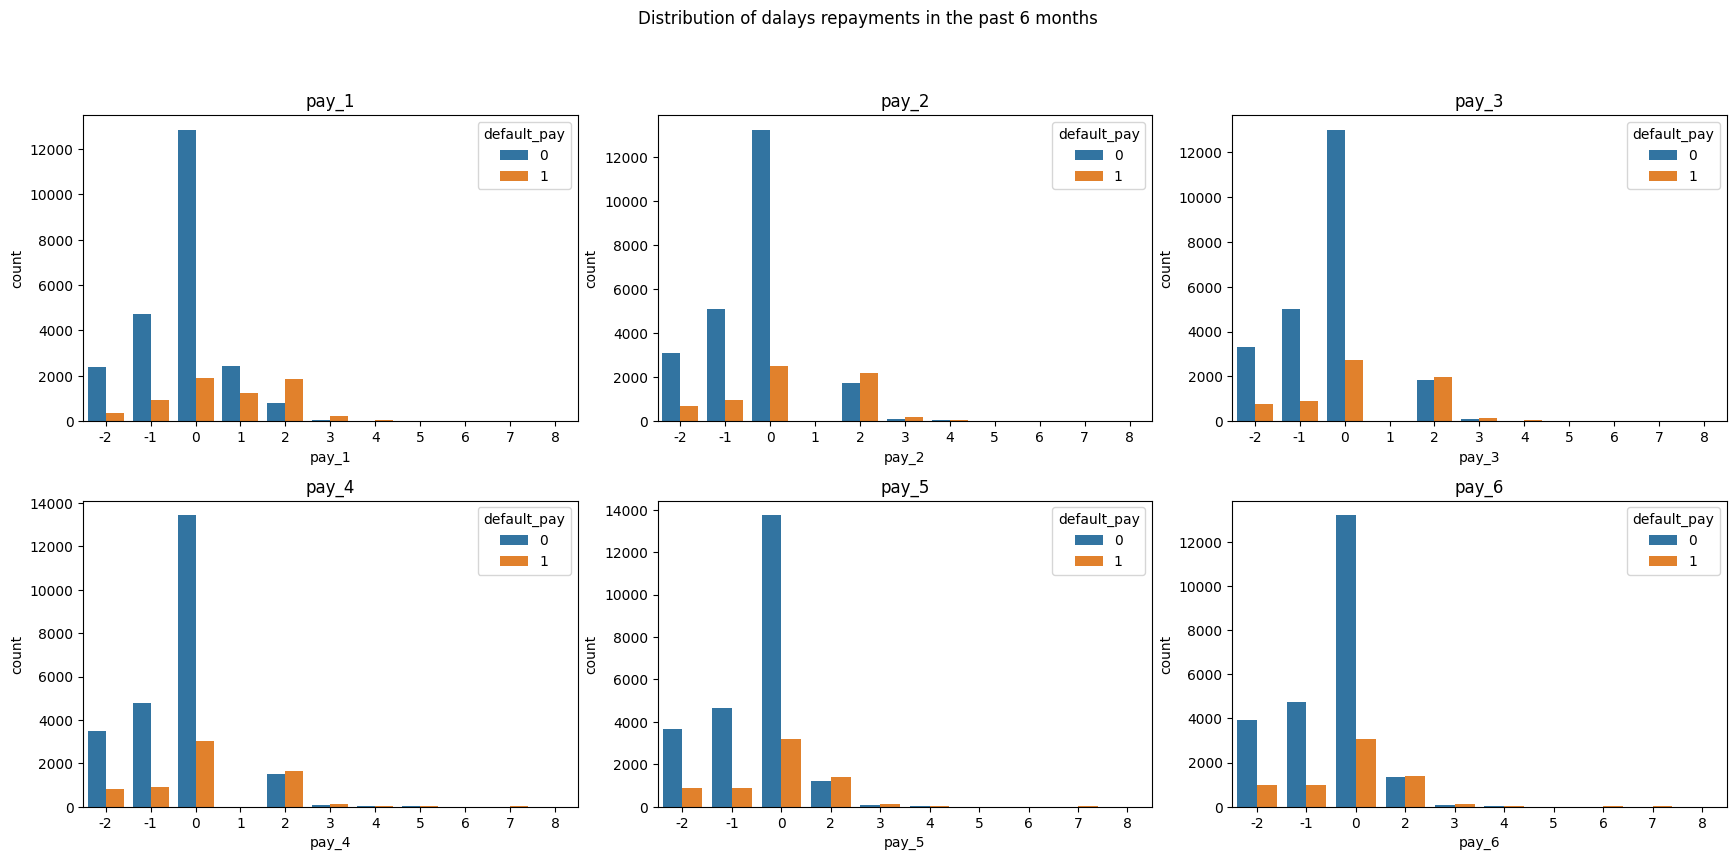

In [ ]:
#Distribution of dalays repayments in the past 6 months
fig, ax = plt.subplots(2,3)
fig.set_size_inches(18,9)
fig.suptitle('Distribution of dalays repayments in the past 6 months')
for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3
    sns.countplot(x=pay_status_columns[i], hue="default_pay", data=df, ax=ax[row,col])
    ax[row,col].set_title(pay_status_columns[i])

plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

In [ ]:
#describing all numerical cols
cols_to_drop = ['id','pay_1','pay_2','pay_3','pay_4','pay_5','pay_6','sex','education','marriage','default_pay']
df_tmp = df.drop(labels=cols_to_drop,axis=1)
df_tmp.describe()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [ ]:
lst = list(pay_amt_columns)
lst.extend(bill_amt_columns)
lst.extend(['limit_bal','age','default_pay'])

<Axes: >

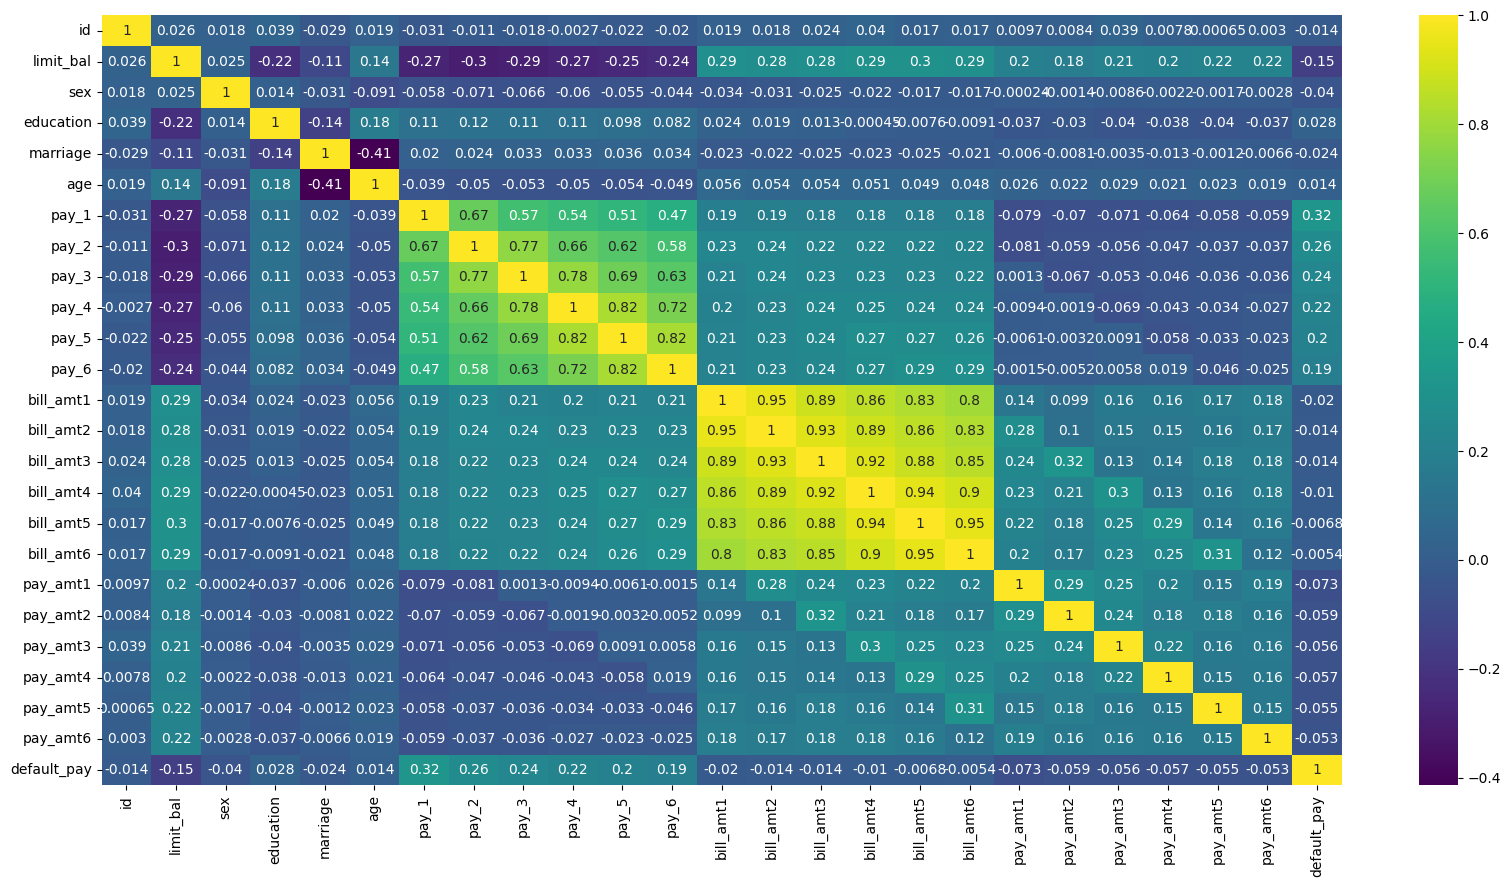

In [ ]:
df_corr = df.copy()
df_corr['default_pay'] = df_original['default payment next month']
#correlation matrix
cm = df_corr.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, cmap = 'viridis')


Limit Balance is negatively correlated with target variable.<br>

bill amt features are internally strongly positively correlated

In [ ]:
print ('Marriage:  ', pd.unique(df['marriage']))
print ('Education: ', pd.unique(df['education']))
print ('Sex:       ', pd.unique(df['sex']))

Marriage:   [1 2 3 0]
Education:  [2 1 3 5 4 6 0]
Sex:        [2 1]


As per documentation of the dataset, for education, we only have following


1 = graduate school; 2 = university; 3 = high school; 4 = others



We will replace 0,5,6 with 'others'

## Exploring Categorical Variables

In [ ]:
# df['sex'] = df['sex'].astype('category').cat.rename_categories(['M', 'F'])
# df['marriage'] = df['marriage'].astype('category').cat.rename_categories(['na','married', 'single', 'other'])
# df['education'] = df['education'].astype('category').cat.rename_categories(['na','grad_school','university', 'high_school', 'others','unknown1','unknown2'])
# df['age_cat'] = pd.cut(df['age'], range(0, 100, 10), right=False)
# for i in pay_status_columns:
#     df[i] = df[i].astype('category')

In [ ]:
# Replace values 4, 5, 6, and 0 with 4 in education column
df['education'] = df['education'].replace([4, 5, 6, 0], 4)
# Print unique values of education column
print(df['education'].unique())

[2 1 3 4]


In [ ]:
df['education'] = df['education'].astype('category').cat.rename_categories([ 'grad_school','university','high_school', 'others'])


In [ ]:
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80s']
df['age_cat'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [ ]:
df['sex'] = df['sex'].replace([1], 'M')
df['sex'] = df['sex'].replace([2], 'F')

# Print unique values of education column
print(df['sex'].unique())

['F' 'M']


In [ ]:
df['marriage'] = df['marriage'].replace([0], 3)

In [ ]:
df['marriage'] = df['marriage'].astype('category').cat.rename_categories(['married', 'single', 'other'])


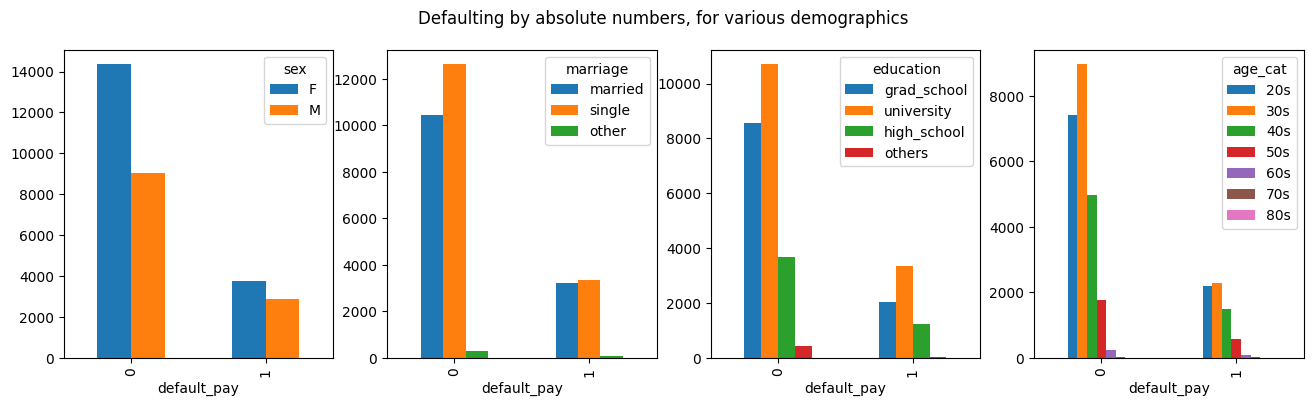

In [ ]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches(16,4)
fig.suptitle('Defaulting by absolute numbers, for various demographics')

d = df.groupby(['default_pay', 'sex']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0])

d = df.groupby(['default_pay', 'marriage']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1])

d = df.groupby(['default_pay', 'education']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2])

d = df.groupby(['default_pay', 'age_cat']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[3])

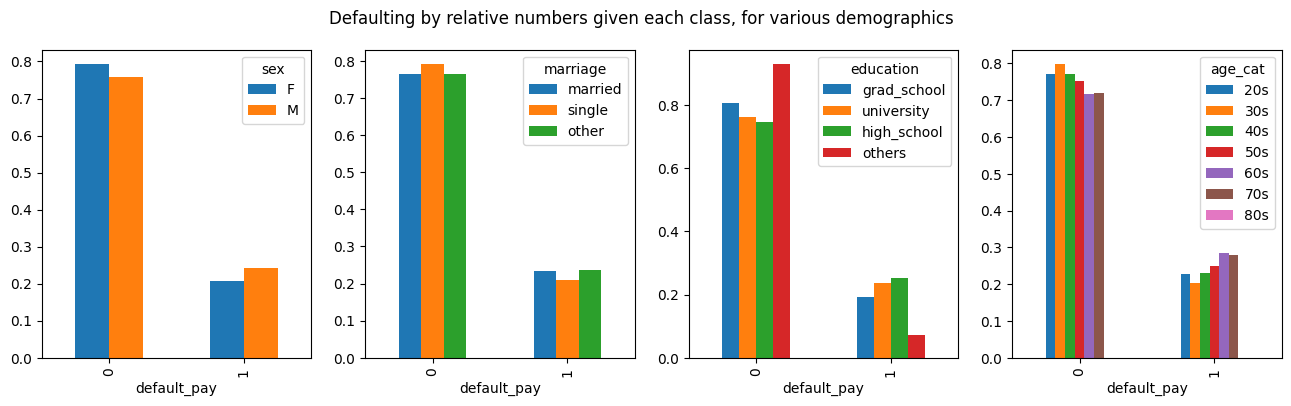

In [ ]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches(16,4)
fig.suptitle('Defaulting by relative numbers given each class, for various demographics')

d = df.groupby(['default_pay', 'sex']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[0])

d = df.groupby(['default_pay', 'marriage']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[1])

d = df.groupby(['default_pay', 'education']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[2])

d = df.groupby(['default_pay', 'age_cat']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[3])

Skewness on limit_bal is :  0.9928173164820109


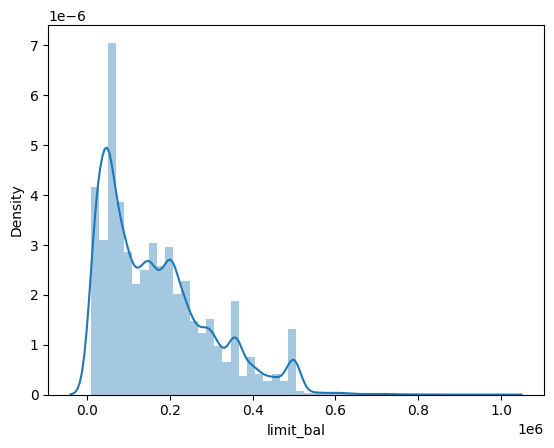

In [ ]:
# Credit limit distribution
sns.distplot(df['limit_bal'],kde=True)
print ('Skewness on limit_bal is : ',skew(df['limit_bal']))

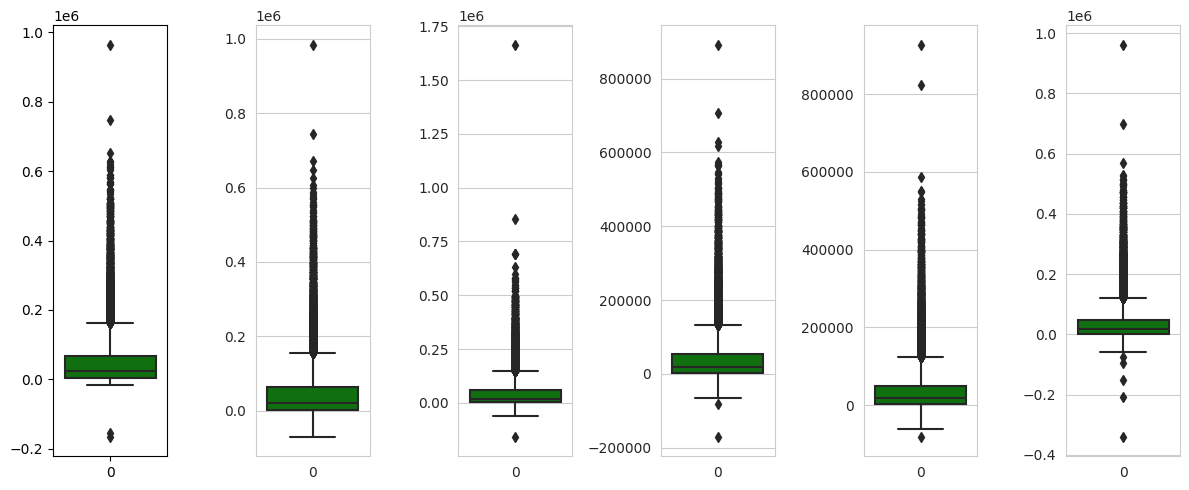

In [ ]:
number_of_columns = 6
number_of_rows = (len(bill_amt_columns) - 1) // number_of_columns + 1
plt.figure(figsize=(2*number_of_columns, 5*number_of_rows))

for i in range(len(bill_amt_columns)):
    plt.subplot(number_of_rows, number_of_columns, i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[bill_amt_columns[i]], color='green', orient='v')
    plt.tight_layout()


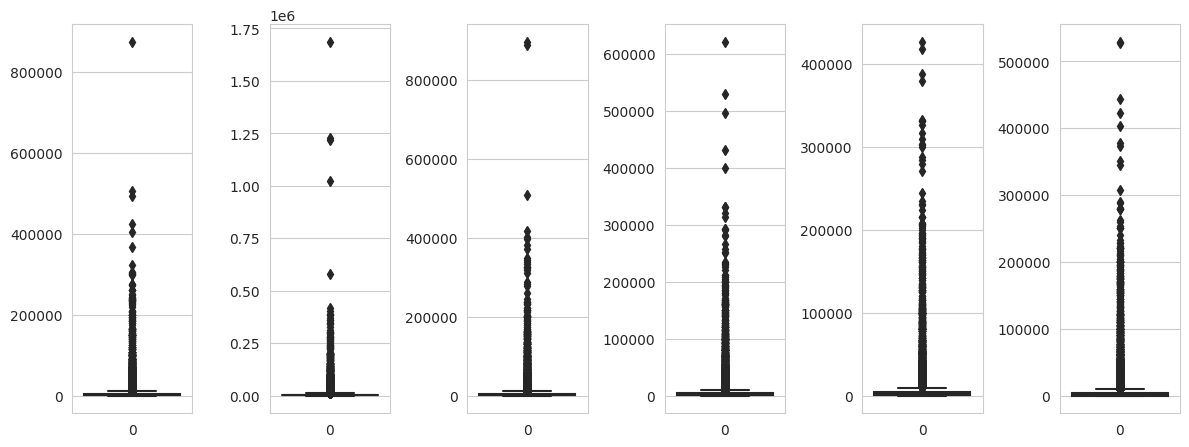

In [ ]:
#checking outliers for pay amount[1 to 6]
number_of_columns=6
number_of_rows = len(pay_amt_columns)-1 //number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(pay_amt_columns)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[pay_amt_columns[i]],color='green',orient='v')
    plt.tight_layout()

As it can be observed that data is infested with outliers(by the logic of extreme values beyond 1.5*IQR), but since removing them would cost lot of valuable loss of information.We decided not to treat them as ouliers.

# Feature Engineering


<Axes: >

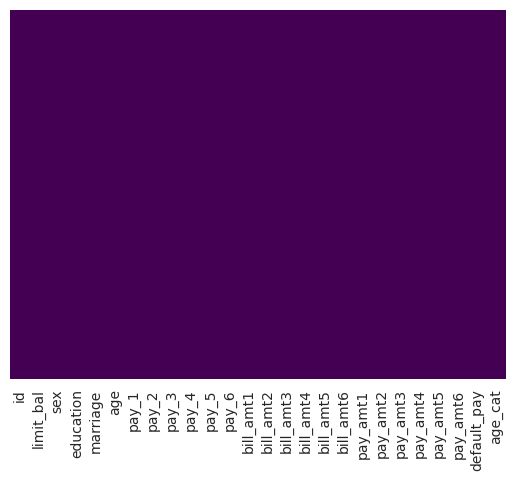

In [ ]:
#Checking missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#Plane box indicates no missing values

There are no missing values in data, its a clean dataset.

# Label Encoding

In [ ]:
# Replace values 4, 5, 6, and 0 with 4 in education column
df['education'] = df['education'].replace([4, 5, 6, 0], 4)

# Print unique values of education column
print(df['education'].unique())

['university', 'grad_school', 'high_school', 'others']
Categories (4, object): ['grad_school', 'university', 'high_school', 'others']


In [ ]:
df['grad_school'] = (df['education']==1).astype('int')
df['university'] = (df['education']==2).astype('int')
df['high_school']= (df['education']==3).astype('int')
df['others'] = ((df['education']==4)).astype('int')

df.drop('education',axis=1,inplace=True)

In [ ]:
df

,id,limit_bal,sex,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_pay,age_cat,grad_school,university,high_school,others
0,1,20000,F,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,20s,0,0,0,0
1,2,120000,F,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,20s,0,0,0,0
2,3,90000,F,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,30s,0,0,0,0
3,4,50000,F,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,30s,0,0,0,0
4,5,50000,M,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,50s,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,M,married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,30s,0,0,0,0
29996,29997,150000,M,single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,40s,0,0,0,0
29997,29998,30000,M,single,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,30s,0,0,0,0
29998,29999,80000,M,married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,40s,0,0,0,0


In [ ]:
df['male'] = (df['sex']=='M').astype('int')
df.drop('sex',axis=1,inplace=True)

In [ ]:
df['married'] = (df['marriage']==1).astype('int')
df['single'] = (df['marriage']==2).astype('int')
df['na'] = (df['marriage']==3).astype('int')
#df['na'] = (df['marriage']==0).astype('int')
df.drop(['marriage','age_cat'],axis=1,inplace=True)

In [ ]:
# Since 0 is labeled as 'pay duly', every negative value should be seen as 0.
for i in pay_status_columns:
    df[i].replace({-2:-1,-1:-1},inplace=True)
 
df.head(10)

,id,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_pay,grad_school,university,high_school,others,male,married,single,na
0,1,20000,24,2,2,-1,-1,-1,-1,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,0,0,0,0
2,3,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,0,0,0,0,0,0
3,4,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,0,0,0,0,0,0
4,5,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,0,0,1,0,0,0
5,6,50000,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,0,0,0,0,1,0,0,0
6,7,500000,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,0,0,0,0,1,0,0,0
7,8,100000,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,0,0,0,0,0,0,0,0
8,9,140000,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0,0,0,0,0,0,0,0,0
9,10,20000,35,-1,-1,-1,-1,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,0,0,0,0,1,0,0,0


# Standardization

In [ ]:
#Scaling
scale = ['limit_bal','bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6','pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
robust_scaler = RobustScaler()
df.loc[:,scale] = robust_scaler.fit_transform(df.loc[:,scale])

In [ ]:
col_values = df.columns.values
print(type(col_values))
out = np.delete(col_values, np.where(col_values == 'default'))
col_values = out 
print(col_values)

<class 'numpy.ndarray'>
['id' 'limit_bal' 'age' 'pay_1' 'pay_2' 'pay_3' 'pay_4' 'pay_5' 'pay_6'
 'bill_amt1' 'bill_amt2' 'bill_amt3' 'bill_amt4' 'bill_amt5' 'bill_amt6'
 'pay_amt1' 'pay_amt2' 'pay_amt3' 'pay_amt4' 'pay_amt5' 'pay_amt6'
 'default_pay' 'grad_school' 'university' 'high_school' 'others' 'male'
 'married' 'single' 'na']


# RFE Wrapper Method

In [ ]:
# loading 3 models like logistic regressiion, decision tree, random forest
lr = LogisticRegression(random_state=9)
dt = DecisionTreeClassifier(random_state=9)
rf = RandomForestClassifier(random_state=9)
X = df.drop('default_pay',axis=1)
y = df['default_pay']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=9,test_size=.2)
# create the RFE model and select 10 attributes
rfe1 = RFE(estimator=lr, n_features_to_select=10)
rfe1 = rfe1.fit(X, y)
print ('Logistic Regression Feature Rankings:')
print(rfe1.ranking_)
print(('==')*40)

rfe2 = RFE(estimator=dt, n_features_to_select=10)
rfe2 = rfe2.fit(X, y)
print ('Decision Tree Feature Rankings:')
print(rfe2.ranking_)
print(('==')*40)

rfe3 = RFE(estimator=rf, n_features_to_select=10)
rfe3 = rfe3.fit(X, y)
print ('Random Forest Feature Rankings:')
print(rfe2.ranking_)
print(('==')*40)


Logistic Regression Feature Rankings:
[13  1  9  1  1  1  3  1  2  1  1  1  8 11 10  1  4  7  5  6 12 15 16 17
 14  1 18 19 20]
Decision Tree Feature Rankings:
[ 1  3  1  1  8  9 13 12 10  1  1  6  2  1  1  5  1  1  7  4  1 15 16 17
 14 11 18 19 20]
Random Forest Feature Rankings:
[ 1  3  1  1  8  9 13 12 10  1  1  6  2  1  1  5  1  1  7  4  1 15 16 17
 14 11 18 19 20]


In [ ]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF2', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))

from sklearn.model_selection import cross_val_score,KFold
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean())
    print(msg)


LR: 0.804125
RF2: 0.817833
DT: 0.726833


Logisitics regression performed better in kfold

In [ ]:
#Selecting rfe1 features since lr performed good in KFold
X = df.iloc[:,[0,2,3,4,6,10,8,9,14,24]]
y = df.default_pay
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=9,test_size=.2)

lr.fit(X_train,y_train)

LogisticRegression(random_state=9)

In [ ]:
perf_metrics = ['Model','Model_Desc','TP','FP','FN','TN','AUC',\
                'Accuracy_Score','Precision','Recall',\
                'F1_Score', 'Matt_Coeff']
df_all_models = pd.DataFrame(columns=perf_metrics)

In [ ]:
def save_performance_metrics(model, model_name, model_dsc, X_test, y_test, X_train=None, y_train=None):
    # nested inner method for adding performance metric
    def add_perf_metric_to_compare(perf_metric_per_model):
        global df_all_models
        model_name = perf_metric_per_model['Model']
        # if model data already exists then drop those rows
        if df_all_models[df_all_models['Model'] == model_name].shape[0] >= 1:
            ind = df_all_models[df_all_models['Model']== model_name].index
            df_all_models.drop(ind, inplace=True)
        s1 = pd.Series(perf_metric_per_model, perf_metric_per_model.keys())
        df_all_models = df_all_models.append(s1, ignore_index=True)    
    
    perf_metric_per_model = {}
    perf_metric_per_model['Model'] = model_name
    perf_metric_per_model['Model_Desc'] = model_dsc
    y_pred = model.predict(X_test)
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    tn, fp, fn, tp = conf_mat.ravel()
    perf_metric_per_model['TP'], perf_metric_per_model['FP'] = tp, fp
    perf_metric_per_model['FN'], perf_metric_per_model['TN'] = fn, tn
    perf_metric_per_model['AP'], perf_metric_per_model['AN'] = tp+fn, fp+tn
    perf_metric_per_model['AUC'] = roc_auc_score(y_test, y_pred)
    perf_metric_per_model['F1_Score'] = f1_score(y_test, y_pred)
    perf_metric_per_model['Accuracy_Score'] = accuracy_score(y_test, y_pred)
    perf_metric_per_model['Precision'] = precision_score(y_test, y_pred)
    perf_metric_per_model['Recall'] = recall_score(y_test, y_pred) 
    perf_metric_per_model['Train_score'] = model.score(X_train, y_train)    
    perf_metric_per_model['Test_score'] = model.score(X_test, y_test)    
    perf_metric_per_model['Matt_Coeff'] = matthews_corrcoef(y_test, y_pred)
    s2 = pd.Series(perf_metric_per_model, index=perf_metric_per_model.keys())
    df_metric = pd.DataFrame(data=[s2], columns=perf_metrics)
    add_perf_metric_to_compare(perf_metric_per_model)
    return df_metric

In [ ]:
# plot ROC and Precision, Recall curve
def plot_roc_and_precision(model_name, model, X_test, y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    # AUC under ROC Curve 
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.title('Receiver Operating Characteristic for {}'.format(model_name))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('TPR (Recall or Sensitivity)')
    plt.xlabel('FPR (1-Specificity)')
    # precision and recall curve
    plt.subplot(122)
    precision, recall, thresholds = precision_recall_curve(y_test, preds)
    plt.step(recall, precision, color='b', alpha=0.1,
         where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve for {}'.format(model_name))
    
    plt.tight_layout(pad=4.0, w_pad=0.5, h_pad=1.0)    
    plt.show()

metrics = pd.DataFrame(index=['accuracy','precision','recall','auc_roc_score'],columns=['LogR','DTree','RF'])

In [ ]:
# metrics    
def CMatrix(CM,labels=['pay','default']):
    df1 = pd.DataFrame(data=CM,index=labels,columns=labels)
    df1.index.name = 'Actual'
    df1.columns.name = 'Predicted'
    df1.loc['Total'] = df1.sum()
    df1['Total'] = df1.sum(axis=1)
    return df1

In [ ]:
y_pred = lr.predict(X_test)
model = lr
model_name = 'ITR1: Logistic Regression (post RFE)'
model_description = 'ITR1: Logistic Regression (with RFE)'
df_metric = save_performance_metrics(model, model_name, model_description, X_test, y_test, X_train, y_train)

In [ ]:
print(classification_report(y_true=y_test,y_pred=y_pred))
print ('mcc : {}'.format( matthews_corrcoef(y_true=y_test,y_pred=y_pred)))
tn, fp, fn, tp = confusion_matrix(y_true=y_test,y_pred=y_pred).ravel()
print("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print ('auc: {}'.format(roc_auc_score(y_true=y_test,y_score=y_pred)))
print ('accuracy: {}'.format(accuracy_score(y_true=y_test,y_pred=y_pred)))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4678
           1       0.66      0.30      0.41      1322

    accuracy                           0.81      6000
   macro avg       0.74      0.63      0.65      6000
weighted avg       0.79      0.81      0.78      6000

mcc : 0.3530395970591446

 TN: 4473 FP: 205 FN: 926 TP: 396 

auc: 0.6278619979962214
accuracy: 0.8115


In [ ]:
#RFE with RandomForest since there was just .01 difference between lr
# create the RFE model and select 10 attributes
X = df.iloc[:,[0,1,2,8,9,10,11,12,13,15]]
y = df.default_pay
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=9,test_size=.2)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print ('mcc : {}'.format( matthews_corrcoef(y_true=y_test,y_pred=y_pred)))
tn, fp, fn, tp = confusion_matrix(y_true=y_test,y_pred=y_pred).ravel()
print("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print ('auc: {}'.format(roc_auc_score(y_true=y_test,y_score=y_pred)))
print ('accuracy: {}'.format(accuracy_score(y_true=y_test,y_pred=y_pred)))


              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4678
           1       0.53      0.21      0.30      1322

    accuracy                           0.79      6000
   macro avg       0.67      0.58      0.59      6000
weighted avg       0.75      0.79      0.75      6000

mcc : 0.2317555966196988

 TN: 4436 FP: 242 FN: 1046 TP: 276 

auc: 0.5785215373858645
accuracy: 0.7853333333333333


In [ ]:
#Stcaking Ensemble with RFE1
X = df.iloc[:,[0,2,3,4,6,10,8,9,14,24]]
y = df['default_pay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=9)
X_train1, X_test1, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.2, random_state=9)

M1 = LogisticRegression()
M2 = DecisionTreeClassifier(max_depth=1,criterion='entropy')
M3 = DecisionTreeClassifier(max_depth=2,criterion='entropy')
M4 = DecisionTreeClassifier(max_depth=1,criterion='entropy')
M5 = DecisionTreeClassifier(max_depth=1,criterion='entropy')



M1.fit(X_train1,y_train2)
M2.fit(X_train1,y_train2)
M3.fit(X_train1,y_train2)
M4.fit(X_train1,y_train2)
M5.fit(X_train1,y_train2)


pred1 = M1.predict_proba(X_test1)
pred2 = M2.predict_proba(X_test1)
pred3 = M3.predict_proba(X_test1)
pred4 = M4.predict_proba(X_test1)
pred5 = M5.predict_proba(X_test1)


A = pd.DataFrame(pred1)[1]
B = pd.DataFrame(pred2)[1]
C = pd.DataFrame(pred3)[1]
D = pd.DataFrame(pred4)[1]
E = pd.DataFrame(pred5)[1]

X_meta = pd.concat([A,B,C,D,E],axis=1)

meta_classifier = RandomForestClassifier(max_depth=2,n_estimators=100)
meta_classifier.fit(X_meta,y_test2)


pred6 = M1.predict_proba(X_test)
pred7 = M2.predict_proba(X_test)
pred8 = M3.predict_proba(X_test)
pred9 = M4.predict_proba(X_test)
pred10 = M5.predict_proba(X_test)


F = pd.DataFrame(pred6)[1]
G = pd.DataFrame(pred7)[1]
H = pd.DataFrame(pred8)[1]
I = pd.DataFrame(pred9)[1]
J = pd.DataFrame(pred10)[1]

K = pd.concat([F,G,H,I,J], axis=1)
y_meta = meta_classifier.predict(K)

In [ ]:
print (classification_report(y_meta,y_test))
print ("auc:{}".format(roc_auc_score(y_meta,y_test))) 
print ("mcc: {}".format(matthews_corrcoef(y_meta,y_test)))
tn, fp, fn, tp = confusion_matrix(y_meta,y_test).ravel()
print ("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print ("accuracy: {}".format(accuracy_score(y_meta,y_test)))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      2692
           1       0.32      0.65      0.42       308

    accuracy                           0.82      3000
   macro avg       0.63      0.75      0.66      3000
weighted avg       0.89      0.82      0.84      3000

auc:0.7451322822793848
mcc: 0.36365796521668736

 TN: 2255 FP: 437 FN: 107 TP: 201 

accuracy: 0.8186666666666667


In [ ]:
#Stcaking Ensemble with RFE3
X = df.iloc[:,[0,2,1,10,8,9,11,12,13,15]]
y = df['default_pay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=9)
X_train1, X_test1, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.2, random_state=9)

M1 = LogisticRegression()
M2 = DecisionTreeClassifier(max_depth=1,criterion='entropy')
M3 = DecisionTreeClassifier(max_depth=2,criterion='entropy')
M4 = DecisionTreeClassifier(max_depth=1,criterion='entropy')
M5 = DecisionTreeClassifier(max_depth=1,criterion='entropy')



M1.fit(X_train1,y_train2)
M2.fit(X_train1,y_train2)
M3.fit(X_train1,y_train2)
M4.fit(X_train1,y_train2)
M5.fit(X_train1,y_train2)


pred1 = M1.predict_proba(X_test1)
pred2 = M2.predict_proba(X_test1)
pred3 = M3.predict_proba(X_test1)
pred4 = M4.predict_proba(X_test1)
pred5 = M5.predict_proba(X_test1)


A = pd.DataFrame(pred1)[1]
B = pd.DataFrame(pred2)[1]
C = pd.DataFrame(pred3)[1]
D = pd.DataFrame(pred4)[1]
E = pd.DataFrame(pred5)[1]

X_meta = pd.concat([A,B,C,D,E],axis=1)

meta_classifier = RandomForestClassifier(max_depth=2,n_estimators=100)
meta_classifier.fit(X_meta,y_test2)


pred6 = M1.predict_proba(X_test)
pred7 = M2.predict_proba(X_test)
pred8 = M3.predict_proba(X_test)
pred9 = M4.predict_proba(X_test)
pred10 = M5.predict_proba(X_test)


F = pd.DataFrame(pred6)[1]
G = pd.DataFrame(pred7)[1]
H = pd.DataFrame(pred8)[1]
I = pd.DataFrame(pred9)[1]
J = pd.DataFrame(pred10)[1]

K = pd.concat([F,G,H,I,J], axis=1)
y_meta = meta_classifier.predict(K)

In [ ]:
print (classification_report(y_meta,y_test))
print("auc:{}".format(roc_auc_score(y_meta,y_test))) 
print ("mcc: {}".format(matthews_corrcoef(y_meta,y_test)))
tn, fp, fn, tp = confusion_matrix(y_meta,y_test).ravel()
print ("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print ("accuracy: {}".format(accuracy_score(y_meta,y_test)))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      2885
           1       0.10      0.57      0.18       115

    accuracy                           0.79      3000
   macro avg       0.54      0.69      0.53      3000
weighted avg       0.95      0.79      0.85      3000

auc:0.6878230728656469
mcc: 0.17625866649719524

 TN: 2313 FP: 572 FN: 49 TP: 66 

accuracy: 0.793
